In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Paso 1: Preprocesamiento de datos (ejemplo básico)
# Serie de datos de prueba
time_series = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
print("time_series: ", time_series)
train_size = int(len(time_series) * 0.6) # tamaño conjunto entrenamiento
train_data, test_data = time_series[:train_size], time_series[train_size:]
print("train_data: ", train_data)
print("test_data: ", test_data)

time_series:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data:  [0 1 2 3 4 5 6 7 8]
test_data:  [ 9 10 11 12 13 14 15]


In [4]:
# Paso 2: Preparación de datos
# Se transforman los datos en secuencias
def create_dataset(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i + seq_length])
    y.append(data[i + seq_length])
  return np.array(X), np.array(y)


In [5]:
# Definir el número de pasos
seq_length = 4
# Crear conjuntos de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

# Imprimir los conjuntos de datos en formato 3D
print("Conjunto de datos de entrenamiento:\n", X_train)
print("Etiquetas de entrenamiento:\n", y_train)
print("Conjunto de secuencias de prueba\n:", X_test)
print("Etiquetas de prueba\n:", y_test)

Conjunto de datos de entrenamiento:
 [[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]]
Etiquetas de entrenamiento:
 [4 5 6 7 8]
Conjunto de secuencias de prueba
: [[ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba
: [13 14 15]


In [6]:
# Paso 3 Contruir el modelo
model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
# Paso 4: Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 108.0961
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.8516 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68.5686 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72.7274 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 86.0910  
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.3577 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 56.4190  
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.9135  
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.9107 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.8630 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.3752 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.4499 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.5498  
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 49.8730  
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43.1744 

<function matplotlib.pyplot.show(close=None, block=None)>

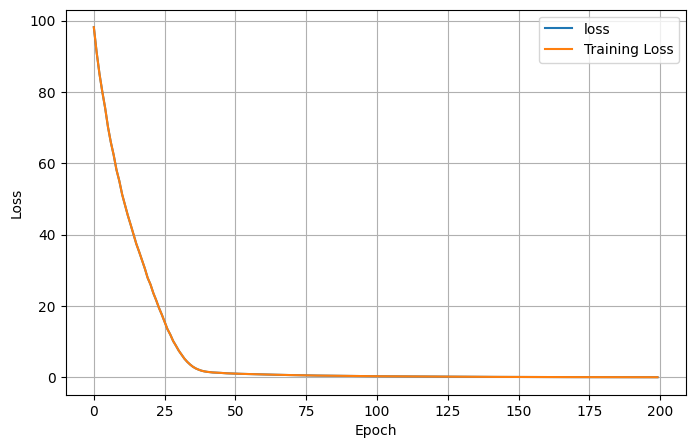

In [7]:
# Paso 5: Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)

# Paso 6: Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show

In [8]:
# Paso 7: Evaluación del modelo
Evaluacion = model.evaluate(X_test, y_test)
print("Evaluación del modelo:", Evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - loss: 1.4114
Evaluación del modelo: 1.411372184753418


In [9]:
# Paso 8: Predicción
print("X_test: \n", X_test)
print("y_test: \n", y_test)
y_pred = model.predict(X_test)
print("y_pred: \n", y_pred)

X_test: 
 [[ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]
y_test: 
 [13 14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
y_pred: 
 [[14.008705]
 [15.179771]
 [16.350842]]
